# Ablation Experiment Results

In [4]:
from capo.analysis.utils import (
    get_results,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    plot_population_scores_comparison,
    plot_length_score,
)

import os

os.chdir("../../")

c:\Users\tzehl\anaconda3\envs\ds\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not import vllm, torch or transformers in vllm.py: No module named 'vllm'


In [1]:
# CAPO    # EVO     # CAPO_MUT    # EVO_MUT
colors = ["#1b9e77", "#7570b3", "#66D874", "#9570b2"]
markers = ["o", "o", "d", "d"]

In [2]:
DATASETS = ["agnews", "gsm8k"]

## No Racing

Failed to load agnews for : No objects to concatenate
Failed to load gsm8k for : No objects to concatenate


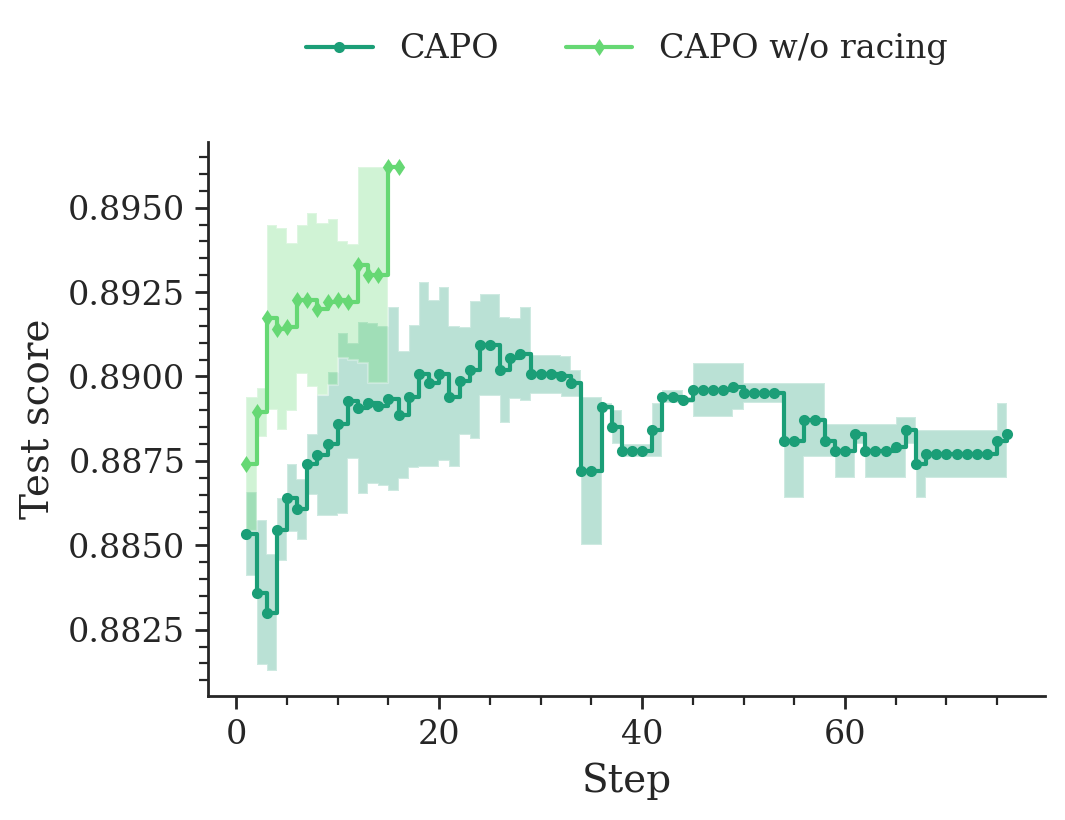

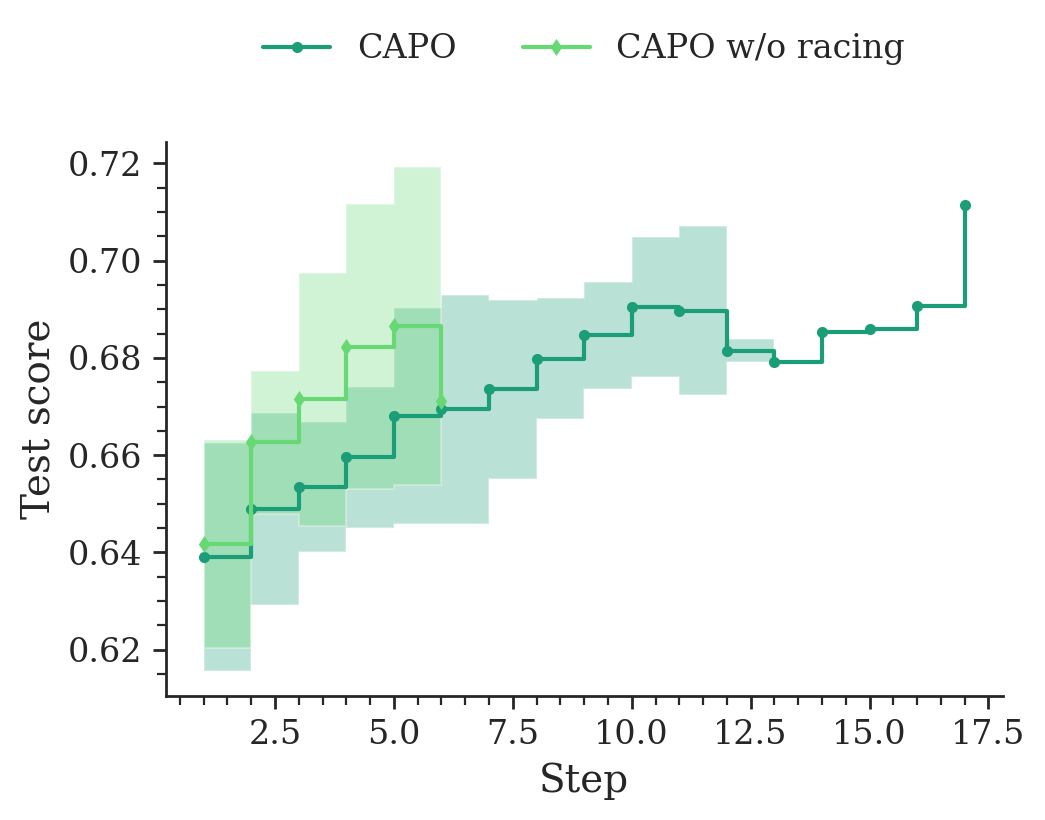

In [ ]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "", "CAPO_no_racing"],
        labels=["CAPO", "", "CAPO w/o racing"],
        plot_stddev=True,
        x_col="step",
        colors=colors,
        markers=markers,
        ncols=2,
    );

- we can do much more steps if we do racing (3x for agnews/2x for gsm8k) with the 5 mio budget.
- in case of gsm8k we increase in performance, while for agnews we are worse than the no racing version
- performance differences lie really close to each other (within one sd)

In [ ]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "", "CAPO_no_racing"],
        labels=["CAPO", "", "CAPO w/o racing"],
        plot_stddev=True,
        plot_seeds=False,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- first results available after less tokens invested (about 500.000 tokens earlier for all seeds)
- in other seeds the results are already available much earlier (after just a couple of 100k tokens)

In [ ]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_no_racing"], "llama")

## Shuffling

In [ ]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "nan", "CAPO_shuffling"],
        x_col="step",
        colors=colors,
        markers=markers,
        labels=["CAPO", "", "CAPO w/ shuffling"],
        ncols=2,
    )

In [ ]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_shuffling"], "llama")

## Zero Shot Performance

In [ ]:
for dataset in ["gsm8k"]:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        labels=["CAPO", "EvoPromptGA", "CAPO zero shot"],
        plot_stddev=True,
        plot_seeds=True,
        x_col="step",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- we can do much more steps without few shots (less token consuming)
- for agnews we get better results in earlier steps when incorporation few-shots
- for gsm8k the shots have a great influence on the performance

In [ ]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        labels=["CAPO", "EvoPromptGA", "CAPO zero shot"],
        plot_stddev=True,
        plot_seeds=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- higher cost efficiency without few shots (good results are early available)
- despite starting not as good as EvoPrompt we manage to take over the lead 


## Generic Initializations

AttributeError: PolyCollection.set() got an unexpected keyword argument 'hatch_linewidth'

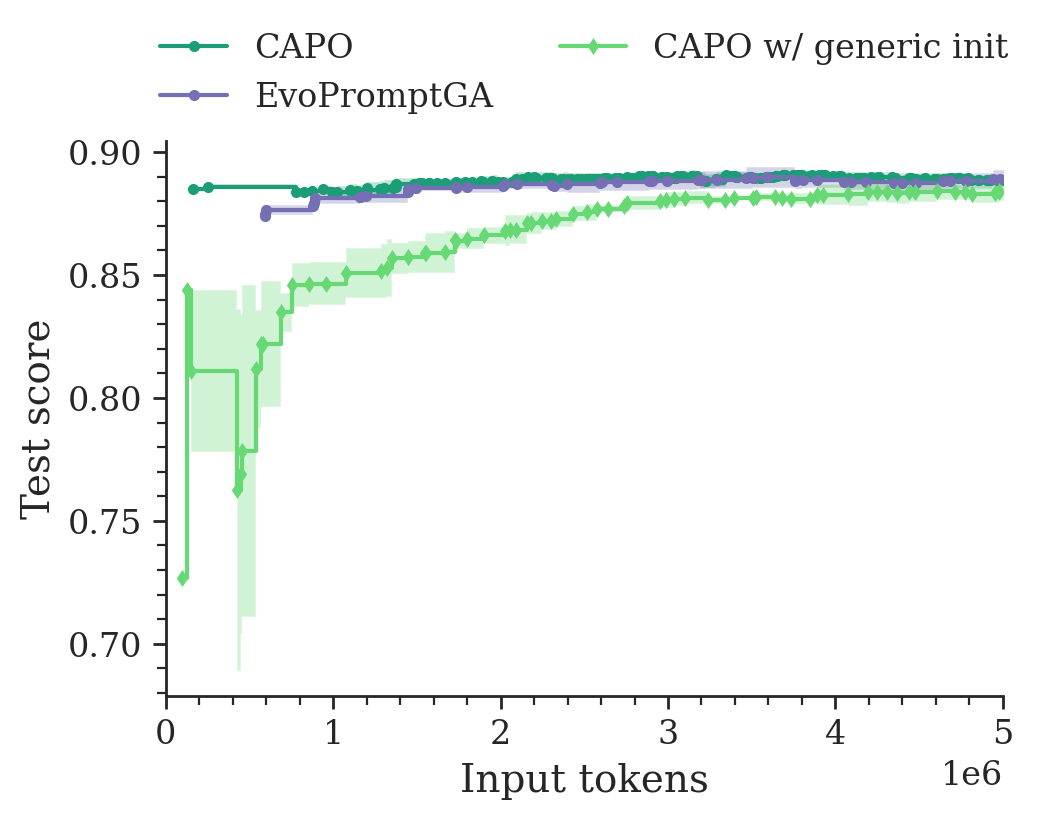

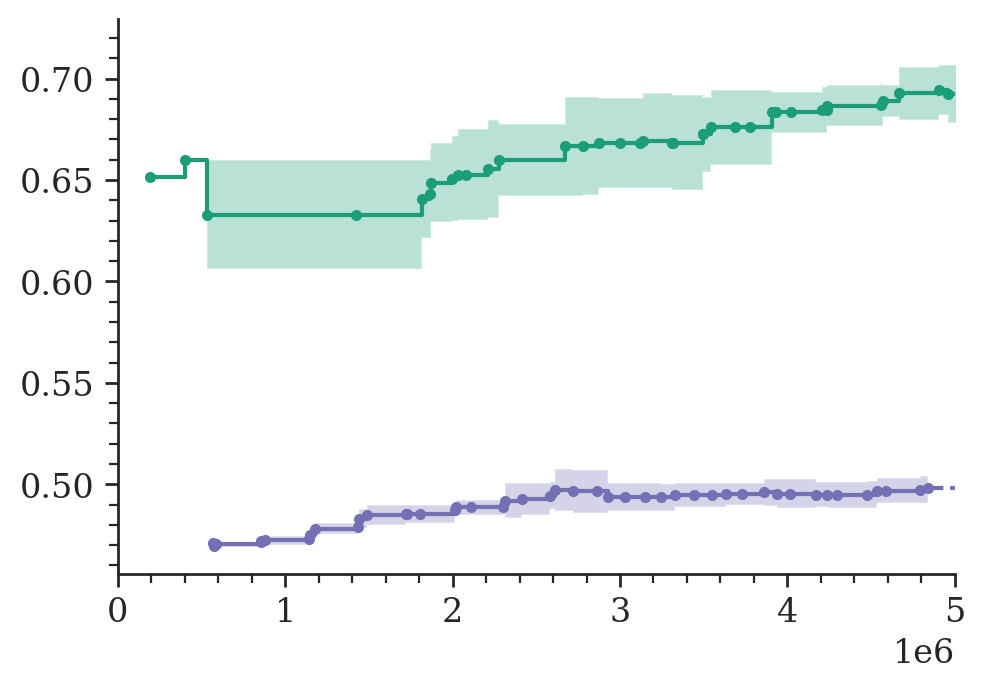

In [5]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_generic_init"],  # , "EvoPromptGA_generic_init"],
        labels=["CAPO", "EvoPromptGA", "CAPO w/ generic init"],  # , "EvoPromptGA w/ generic init"],
        plot_stddev=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

In [6]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
)

,agnews,gsm8k,avg
CAPO,88.80±0.75,73.73±3.73,81.27
EvoPromptGA,88.67±0.41,50.87±0.74,69.77
EvoPromptGA_generic_init,23.20±0.00,53.47±0.38,38.33
CAPO_generic_init,89.33±0.19,82.93±2.36,86.13


In [7]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
    score_col="prompt_len",
)

,agnews,gsm8k,avg
CAPO,110.33±45.57,480.67±112.90,295.50
EvoPromptGA,30.00±0.82,27.67±2.05,28.83
EvoPromptGA_generic_init,17.00±8.04,20.33±1.89,18.67
CAPO_generic_init,182.00±21.92,205.67±112.74,193.83


In [ ]:
plot_length_score(
    "gsm8k",
    "llama",
    ["CAPO", "EvoPromptGA", "CAPO_generic_init"],
    x_col="prompt_len",
    score_col="test_score",
    log_scale=False,
);

In [ ]:
print(
    get_results("gsm8k", "llama", "CAPO_generic_init")
    .groupby("prompt", as_index=False)
    .first()
    .sort_values("test_score", ascending=False)
    .iloc[0]["prompt"]
)

## EvoPrompt Simplified Template

In [ ]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["nan", "EvoPromptGA", "nan", "EvoPromptGA_TD"],
        plot_stddev=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    )

- using our simplified template (which also incorporates a task description) we perform slightly worse than the vanilla EvoPromptGA
- lets move this in the appendix

## Plot multiple into one

In [ ]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    continuous_colors=True,
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

In [ ]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    continuous_colors=True,
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

In [ ]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    x_col="input_tokens_cum",
    continuous_colors=True,
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

In [ ]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO", "CAPO_shuffling", "CAPO_no_racing", "CAPO_zero_shot"],
    labels=["CAPO", "CAPO w/ shuffling", "CAPO w/o racing", "CAPO zero shot"],
    plot_stddev=True,
    plot_seeds=False,
)

In [ ]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=[
        "CAPO",
        "CAPO_zero_shot",
        "CAPO_no_lp",
        "CAPO_no_racing",
        "CAPO_generic_init",
        "EvoPromptGA",
    ],
    model="llama",
)

In [ ]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=[
        "CAPO",
        "CAPO_zero_shot",
        "CAPO_no_lp",
        "CAPO_no_racing",
        "CAPO_generic_init",
        "EvoPromptGA",
    ],
    model="llama",
    score_col="prompt_len",
)